In [41]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
# Load the data
df = pd.read_csv('synthetic_health_services_data.csv')

In [43]:
# Create categorical variables
df['gender_cat'] = df['gender'].astype('category').cat.codes
df['procedure_type_cat'] = df['procedure_type'].astype('category').cat.codes
df['priority_level_cat'] = df['priority_level'].astype('category').cat.codes

In [44]:
# Factors associated with longer waiting times
X = df[['age', 'gender_cat', 'procedure_type_cat', 'priority_level_cat']]
X = sm.add_constant(X)
y = df['waiting_time_days']
model = sm.OLS(y, X).fit()
with open('factors_associated_with_waiting_times.txt', 'w') as f:
    f.write(model.summary().as_text())

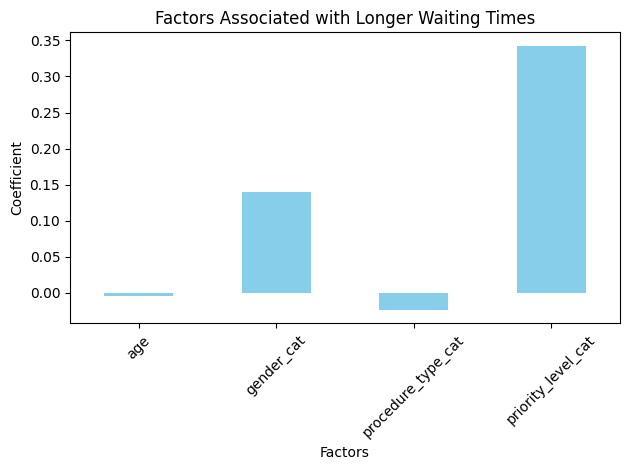

In [45]:
# Plot factors associated with longer waiting times
coefficients = model.params[1:]
coefficients.plot(kind='bar', color='skyblue')
plt.title('Factors Associated with Longer Waiting Times')
plt.xlabel('Factors')
plt.ylabel('Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('factors_associated_with_waiting_times.png')

In [46]:
# Probability of undergoing elective surgery within the recommended time
within_recommended_prob = df['within_recommended_time'].mean()
with open('probability_within_recommended_time.txt', 'w') as f:
    f.write(f"Probability of undergoing elective surgery within the recommended time: {within_recommended_prob:.2f}")

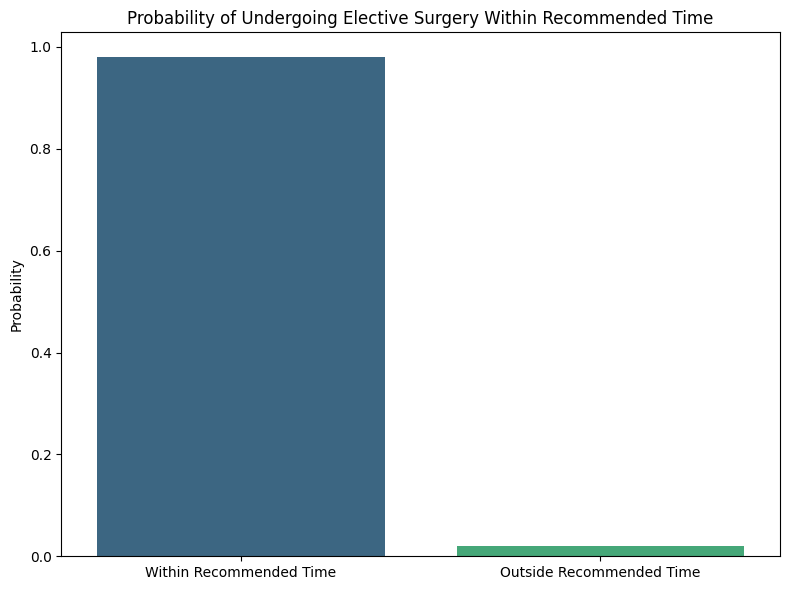

In [47]:
# Plot the probability of undergoing elective surgery within the recommended time
plt.figure(figsize=(8, 6))
sns.barplot(x=['Within Recommended Time', 'Outside Recommended Time'],
            y=[within_recommended_prob, 1 - within_recommended_prob], palette='viridis', hue=['Within', 'Outside'], legend=False)
plt.title('Probability of Undergoing Elective Surgery Within Recommended Time')
plt.ylabel('Probability')
plt.tight_layout()
plt.savefig('probability_within_recommended_time.png')

In [48]:
# How does the type of procedure affect waiting time?
procedure_waiting_times = df.groupby('procedure_type')['waiting_time_days'].mean()
procedure_waiting_times.to_csv('procedure_waiting_times.csv')

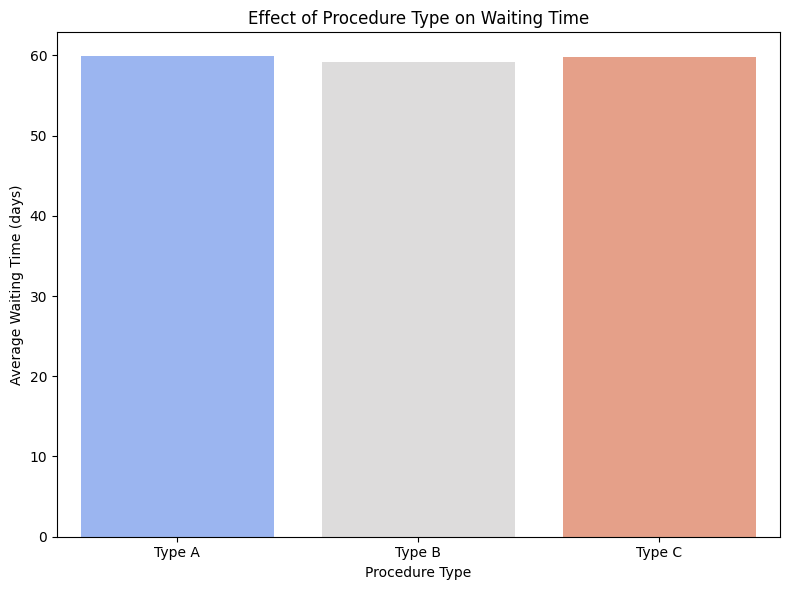

In [49]:
# Plot the type of procedure affect waiting time
plt.figure(figsize=(8, 6))
sns.barplot(x=procedure_waiting_times.index, y=procedure_waiting_times.values, palette='coolwarm', hue=procedure_waiting_times.index, legend=False)
plt.title('Effect of Procedure Type on Waiting Time')
plt.xlabel('Procedure Type')
plt.ylabel('Average Waiting Time (days)')
plt.tight_layout()
plt.savefig('procedure_waiting_times.png')


<Figure size 800x600 with 0 Axes>

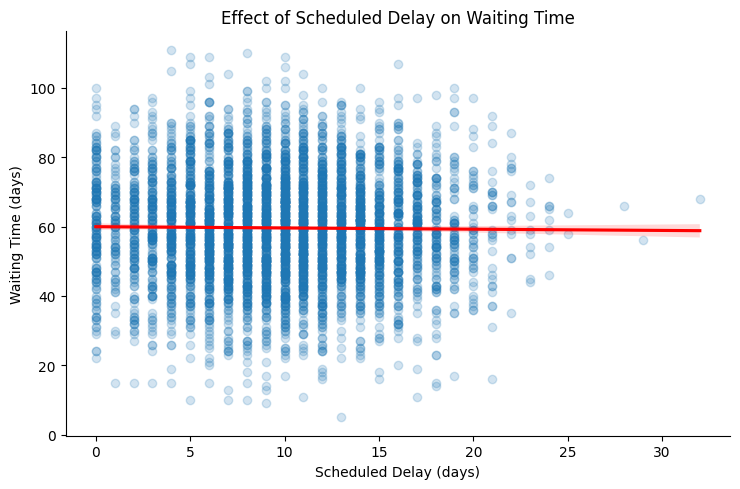

In [50]:
# Effects of delays in scheduling an operation
plt.figure(figsize=(8, 6))
sns.lmplot(x='scheduled_delay_days', y='waiting_time_days', data=df, aspect=1.5, scatter_kws={'alpha':0.2}, line_kws={'color':'red'})
plt.title('Effect of Scheduled Delay on Waiting Time')
plt.xlabel('Scheduled Delay (days)')
plt.ylabel('Waiting Time (days)')
plt.tight_layout()
plt.savefig('effect_of_delay.png')


In [51]:
# Risk of unplanned emergency surgery among patients waiting for surgery
unplanned_emergency_risk = df.groupby('waiting_time_days')['unplanned_emergency'].mean()
unplanned_emergency_risk.to_csv('unplanned_emergency_risk.csv')

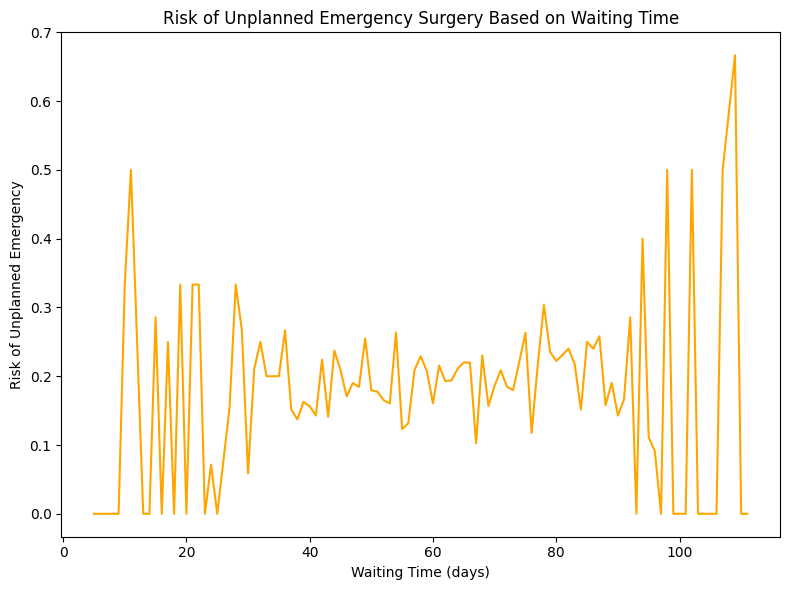

In [52]:
# Plot risk of unplanned emergency surgery
plt.figure(figsize=(8, 6))
sns.lineplot(x=unplanned_emergency_risk.index, y=unplanned_emergency_risk.values, color='orange')
plt.title('Risk of Unplanned Emergency Surgery Based on Waiting Time')
plt.xlabel('Waiting Time (days)')
plt.ylabel('Risk of Unplanned Emergency')
plt.tight_layout()
plt.savefig('unplanned_emergency_risk.png')

In [53]:
# Risk of death associated with delayed surgical treatment
death_risk = df.groupby('waiting_time_days')['outcome'].apply(lambda x: (x == 'Death').mean())
death_risk.to_csv('death_risk.csv')

Analysis completed. Results saved.


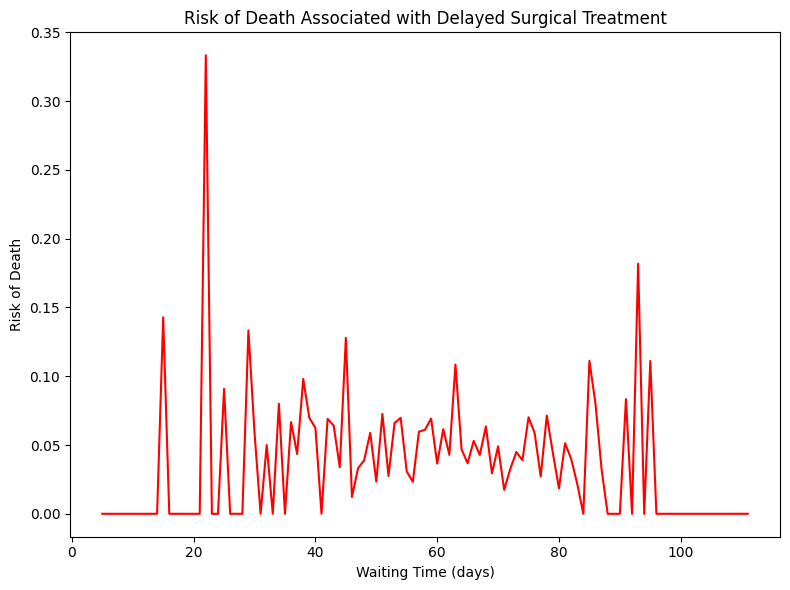

In [54]:
# Plot risk of death associated with delayed surgical treatment
plt.figure(figsize=(8, 6))
sns.lineplot(x=death_risk.index, y=death_risk.values, color='red')
plt.title('Risk of Death Associated with Delayed Surgical Treatment')
plt.xlabel('Waiting Time (days)')
plt.ylabel('Risk of Death')
plt.tight_layout()
plt.savefig('death_risk.png')

print("Analysis completed. Results saved.")